In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
tesla=pd.read_csv("TSLA.csv")

In [3]:
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
1,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
2,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
3,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500
4,2010-07-07,3.280,3.326,2.996,3.160,3.160,34608500


In [4]:
tesla.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2.579000e+03
mean,49.206686,50.301806,48.073117,49.253279,49.253279,3.078217e+07
std,57.934102,59.888383,55.852349,58.119783,58.119783,2.855717e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,7.159000,7.268000,6.989000,7.153000,7.153000,1.047400e+07
50%,44.001999,44.660000,43.301998,43.924000,43.924000,2.413100e+07
75%,59.339000,60.171000,57.841000,59.020000,59.020000,3.979150e+07
max,502.140015,502.489990,470.510010,498.320007,498.320007,3.046940e+08


In [5]:
tesla.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
tesla.duplicated().sum()

0

In [7]:
#sorting the data according to date to get a continuous flow of data
tesla.sort_values('Date',ascending=True)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
1,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
2,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
3,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
4,2010-07-07,3.280000,3.326000,2.996000,3.160000,3.160000,34608500
...,...,...,...,...,...,...,...
2574,2020-09-21,453.130005,455.679993,407.070007,449.390015,449.390015,109476800
2575,2020-09-22,429.600006,437.760010,417.600006,424.230011,424.230011,79580800
2576,2020-09-23,405.160004,412.149994,375.880005,380.359985,380.359985,95074200
2577,2020-09-24,363.799988,399.500000,351.299988,387.790009,387.790009,96561100


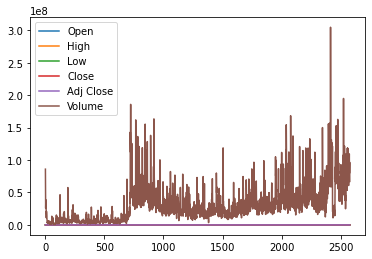

In [8]:
tesla.plot()
plt.show()

(<Figure size 1080x360 with 1 Axes>, <AxesSubplot:>)

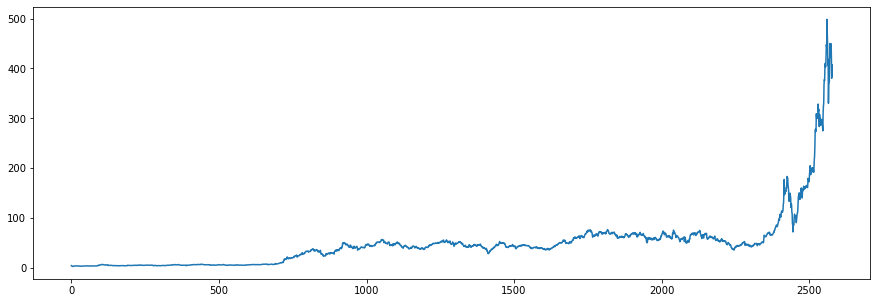

In [9]:
plt.figure(figsize=(15,5)),tesla.Close.plot()

In [10]:
#finding 30% percent of the data for train test split
2579*30/100

773.7

In [11]:
2579-773

1806

In [12]:
train=tesla.head(1806)
test=tesla.tail(773)

In [13]:
x=tesla[['Open','High','Low','Volume']].values
y=tesla['Close'].values

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

In [15]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [16]:
lr_pred=lr.predict(x_test)

In [17]:
lr_score=lr.score(x_train,y_train)*100,lr.score(x_test,y_test)*100,
lr_score

(99.9289583548221, 99.9683802820477)

In [18]:
99.96838028208998, 99.9289583548221

(99.96838028208998, 99.9289583548221)

In [19]:
lr_pred

array([ 48.28914449,   5.45566798,  67.82128469,   6.67994154,
        50.57502952,  50.1617738 ,  41.86056848,  24.43110999,
        49.55447168,  43.90036552, 298.82558925,  37.52571144,
         7.84703229,  43.74585823,  54.55203601,   4.851337  ,
        43.062659  ,  62.24937614,   6.61308522,  50.87314257,
       162.21031174,  54.02986781,  26.90393361,  17.37669898,
        67.53457809,  45.30904158,  72.84831234,  49.06606568,
       143.29804214,  51.93023302,  50.70437759,  29.53001059,
        49.58209693,  47.45654026,  32.78133944, 155.08483412,
        62.71107765,   4.3513569 ,  43.69674143,  27.58859933,
        58.69852396,  38.25136847,  38.98251183,  38.58968014,
        23.66735021,  39.00627047,   3.44442702,  40.98193686,
         7.99964843,  52.45775906,   3.95789754,   5.73416735,
         3.00864116,  42.26425866,  33.17033388,   7.29318426,
         7.19982391,  49.53666747, 449.61927848,   8.2447838 ,
       130.85756513,  47.09693149,  70.11790864,  41.82

In [20]:
y_test

array([ 48.598   ,   5.348   ,  68.57    ,   6.43    ,  49.812   ,
        50.004002,  41.400002,  24.690001,  49.785999,  43.472   ,
       297.      ,  38.782001,   7.708   ,  43.888   ,  53.790001,
         4.65    ,  43.529999,  62.924   ,   6.426   ,  51.400002,
       163.884003,  54.992001,  27.09    ,  18.450001,  66.185997,
        45.849998,  72.550003,  48.948002, 145.029999,  52.188   ,
        50.700001,  29.916   ,  49.625999,  47.119999,  33.756001,
       153.457993,  63.362   ,   4.17    ,  43.299999,  27.472   ,
        59.408001,  38.158001,  38.546001,  38.613998,  23.936001,
        39.217999,   3.48    ,  40.807999,   7.796   ,  52.062   ,
         3.806   ,   5.596   ,   3.16    ,  41.554001,  33.736   ,
         7.202   ,   7.016   ,  49.546001, 447.75    ,   8.22    ,
       121.599998,  47.549999,  69.528   ,  41.490002,  44.214001,
        56.004002, 126.846001,  63.444   ,  48.245998,  68.503998,
         5.012   ,  57.790001,  40.576   ,  40.931999,   6.624

In [21]:
result=pd.DataFrame({'Actual':y_test.flatten(),'Predicted':lr_pred.flatten()})

In [22]:
result.head(10)

,Actual,Predicted
0,48.598000,48.289144
1,5.348000,5.455668
2,68.570000,67.821285
3,6.430000,6.679942
4,49.812000,50.575030
5,50.004002,50.161774
6,41.400002,41.860568
7,24.690001,24.431110
8,49.785999,49.554472
9,43.472000,43.900366


In [23]:
from sklearn.svm import SVR

In [24]:
svr=SVR(kernel="poly")
svr.fit(x_train,y_train)
svr_pred=svr.predict(x_test)
print(svr_pred)

[ 43.91688943  43.16628004  43.31919316  43.20207349  43.33651885
  43.34899347  43.78301264  44.23328963  44.49323342  43.21923652
  44.31211582  47.45003326  43.2130016   43.97980787  43.75827918
  43.16446642  44.11642313  44.81748451  43.16193308  44.0799508
  50.22341946  46.891346    44.79456925  60.15200345  43.71111035
  43.39387646  43.52034836  43.57920299  47.06500037  43.24459358
  43.37470223  43.60666881  43.3837066   43.38782548  49.20784956
  46.0858003   43.32091571  43.16180182  43.32740378  43.99443799
  43.80291311  43.75391568  54.13886866  43.24051416  43.50567783
  43.32257692  43.27362719  43.40089943  43.16273358  43.72243583
  43.16533855  43.16202288  43.71979552  43.45431702  43.49440166
  43.17453268  43.16402947  43.18028618  65.54145374  43.46425476
  43.22879769  43.54241474  43.73558976  43.20305827  43.19920946
  43.78044434  43.1936293   43.37702614  43.2993686   44.24596813
  43.16578811  44.14158365  49.61095518  43.20048902  43.16188077
  56.737588

In [25]:
svr.score(x_test,y_test)*100,svr.score(x_train,y_train)*100

(5.684816600165532, 4.127276568252302)

In [26]:
result2=pd.DataFrame({'Actual':y_test.flatten(),'Predicted':svr_pred.flatten()})
result2.head(10)

,Actual,Predicted
0,48.598000,43.916889
1,5.348000,43.166280
2,68.570000,43.319193
3,6.430000,43.202073
4,49.812000,43.336519
5,50.004002,43.348993
6,41.400002,43.783013
7,24.690001,44.233290
8,49.785999,44.493233
9,43.472000,43.219237


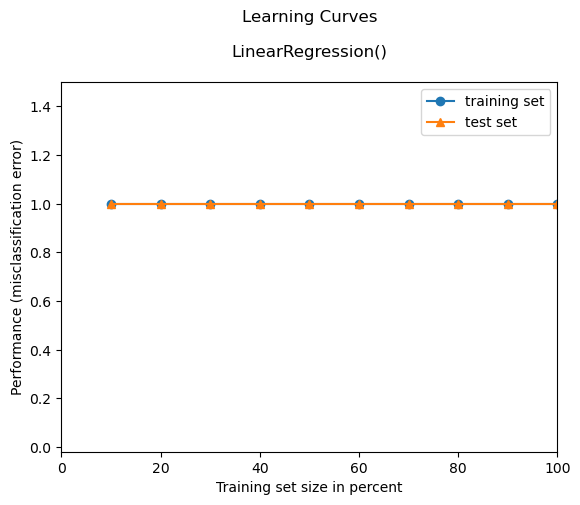

In [27]:
from mlxtend.plotting import plot_learning_curves
# instantiating the model 
clf = lr
 
# plotting the learning curve
plot_learning_curves(X_train=x_train,
                     y_train=y_train,
                     X_test=x_test,
                     y_test=y_test,
                     clf=clf,
                     scoring="misclassification error",
                     suppress_plot=False,
                     print_model=True)
plt.ylim(top=1.5, bottom=-0.02)
plt.xlim(left=0.0, right=100)
plt.show()

In [28]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

import math

In [29]:
print('Mean Absolute Error for LinearRegression :', metrics.mean_absolute_error(y_test,lr_pred))
print('Mean Squared Error for LinearRegression :', metrics.mean_squared_error(y_test,lr_pred))
print('Root Mean Squared Error for LinearRegression :', math.sqrt(metrics.mean_squared_error(y_test,lr_pred)))

Mean Absolute Error for LinearRegression : 0.49069744079219535
Mean Squared Error for LinearRegression : 1.0193561915659104
Root Mean Squared Error for LinearRegression : 1.009631710855949


<AxesSubplot:>

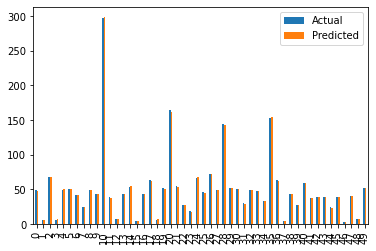

In [30]:
graph=result.head(50)
graph.plot(kind='bar')

<AxesSubplot:ylabel='Frequency'>

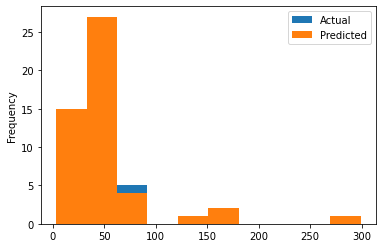

In [31]:
graph.plot(kind='hist')

         Actual   Predicted
438   40.301998   40.621283
110   30.488001   30.719780
4     49.812000   50.575030
408  380.359985  392.067581
123   51.375999   50.508223
100   50.602001   51.272948
616    6.780000    7.046037
352    5.298000    5.381967
511    5.334000    5.433560
233   56.366001   56.418162
261   64.328003   63.682376
379   39.147999   38.638637
640   48.228001   48.079355
477  367.127991  362.889743
247   48.048000   47.507290
287   67.746002   68.281023
612   39.063999   39.248559
466   10.086000   10.020770
50     3.806000    3.957898
474   67.589996   68.169623
105   45.023998   44.632146
461   50.293999   50.435975
454    5.870000    6.020154
209    5.238000    5.475181
415   45.945999   45.570025
569    5.278000    5.403662
74     6.624000    6.794141
627   66.258003   66.139375
482   83.844002   83.246282
121    6.914000    7.053284
98    45.860001   45.573337
106   60.771999   61.109666
185   42.667999   42.369862
269   40.084000   40.278256
92     3.950000    4

<AxesSubplot:>

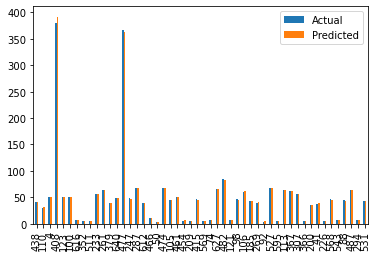

In [32]:
graph=result.sample(50)
print(graph)
graph.plot(kind='bar')

In [33]:
from sklearn.linear_model import Ridge

In [34]:
clf=Ridge()
clf.fit(x_train,y_train)
clf_pred=clf.predict(x_test)
clf_pred

array([ 48.28887096,   5.45560429,  67.82138152,   6.67986373,
        50.57485389,  50.16188297,  41.8604677 ,  24.43118141,
        49.55424925,  43.90043367, 298.82456028,  37.52598298,
         7.84701522,  43.74570319,  54.55216573,   4.85129967,
        43.06249671,  62.24943723,   6.61304609,  50.87312292,
       162.20993984,  54.02989171,  26.90400731,  17.37691437,
        67.53475333,  45.30916833,  72.84836616,  49.06608159,
       143.29794825,  51.93023631,  50.70450628,  29.53004942,
        49.58220536,  47.45655668,  32.78159994, 155.0849888 ,
        62.71110168,   4.35130923,  43.69687207,  27.58868673,
        58.6985739 ,  38.25152878,  38.98263057,  38.58963274,
        23.66735181,  39.00616429,   3.44441261,  40.98205217,
         7.99960125,  52.45778426,   3.95786654,   5.73412758,
         3.00865743,  42.26423804,  33.17013002,   7.29311458,
         7.19978267,  49.53663712, 449.61750077,   8.24480921,
       130.85621512,  47.09680488,  70.11813353,  41.82

In [35]:
clf_score=clf.score(x_train,y_train)*100,clf.score(x_test,y_test)*100
clf_score

(99.92895835127862, 99.96837680410903)

In [36]:
print('Mean Absolute Error for RidgeRegression :', metrics.mean_absolute_error(y_test,clf_pred))
print('Mean Squared Error for RidgeRegression :', metrics.mean_squared_error(y_test,clf_pred))
print('Root Mean Squared Error for RidgeRegression :', math.sqrt(metrics.mean_squared_error(y_test,clf_pred)))

Mean Absolute Error for RidgeRegression : 0.49070941029680365
Mean Squared Error for RidgeRegression : 1.0194683133226976
Root Mean Squared Error for RidgeRegression : 1.009687235396535


In [37]:
print(lr_score,'\n',clf_score)

(99.9289583548221, 99.9683802820477) 
 (99.92895835127862, 99.96837680410903)
